# Integración numérica

In [1]:
%matplotlib inline
import numpy as np
from sympy import *
import pandas as pd
from scipy import stats
from scipy.integrate import quad
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
init_printing()

$$ y=\int_a^b f(x) dx $$

## Ejercicio

Gráfica la siguiente función utilizando numpy
$$ f(x) =sin(x) $$
El rango es de 0 a pi

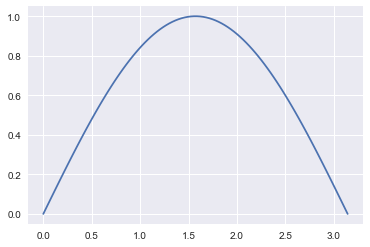

In [2]:
t=np.linspace(0,np.pi,100)
plt.plot(t,np.sin(t))

## Numérico

In [3]:
f=lambda x: np.sin(x)
quad(f,0,np.pi)

## Simbólico

In [4]:
x=Symbol('x')
integrate(sin(x),x)

In [5]:
integrate(sin(x),(x,0,pi))

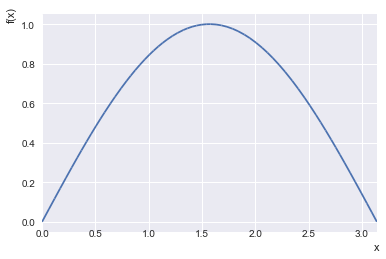

In [6]:
plot(sin(x),(x,0,pi))

In [7]:
f1=integrate(sin(x))
f2=lambdify(x,f1)

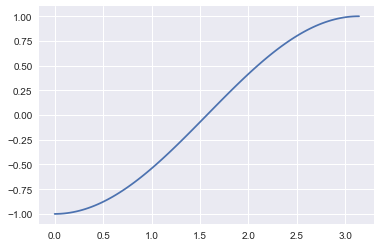

In [8]:
#Resultado simbólico
plt.plot(t,f2(t))

In [31]:
pi

## Integración por Monte Carlo

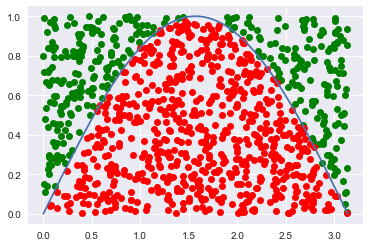

In [9]:
# Número de puntos tirados aleatoriamente
Num= 1000
f= lambda x: np.sin(x)
a,b =0,np.pi
Altura=1

# Puntos aleatorios en (x,y)
x= np.random.uniform(a,b,Num)
y=np.random.uniform(a,Altura,Num)

#Puntos para graficar la función
x_graf=np.arange(a,b,.01)
fx=f(x)

plt.plot(x[y>fx],y[y>fx],"go")
plt.plot(x[y<=fx],y[y<=fx],"ro")
plt.plot(x_graf,f(x_graf))

In [10]:
#Integración por montecarlo
N_0=len(x[y<fx])
Base=b-a
yest=N_0/Num*(Base*Altura)
print(yest)

2.092300707290802


## Ejercicio 

Grafica la siguiente funión e integrala de 0 a pi 
$$ f(x)=-x^2+10 $$

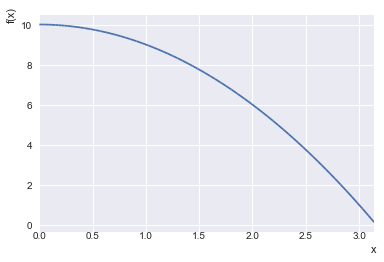

In [64]:
x=Symbol('x')
F1=-x**2+10
plot(F1,(x,0,pi))

## Numérico

In [66]:
F= lambda t:-t**2+10
quad(F,0,np.pi)

## Simbólico

In [68]:
N(integrate(F1,(x,0,pi)))

## Montecarlo

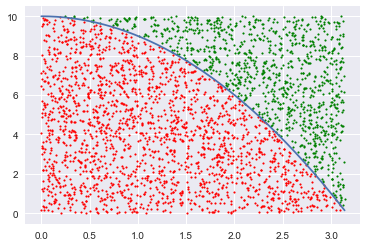

In [76]:
# Número de puntos tirados aleatoriamente
Num= 3000
a,b =0,np.pi
Altura=np.max(F(t))

# Puntos aleatorios en (x,y)
x= np.random.uniform(a,b,Num)
y=np.random.uniform(a,Altura,Num)

#Puntos para graficar la función
x_graf=np.arange(a,b,.01)
fx=F(x)

#plt.plot(x[y>fx],y[y>fx],"go")
#plt.plot(x[y<=fx],y[y<=fx],"ro")
plt.scatter(x[y>fx],y[y>fx],s=3,color='green')
plt.scatter(x[y<=fx],y[y<=fx],s=3,color='red')
plt.plot(x_graf,F(x_graf))

In [71]:
#Integración por montecarlo
N_0=len(x[y<fx])
Base=b-a
yest=N_0/Num*(Base*Altura)
print(yest)

21.331414117874697


# Ejercicio 

Aproxime el área entre las cuvas $y=x$ y $y=x^2$ en el intervalo [0,1]

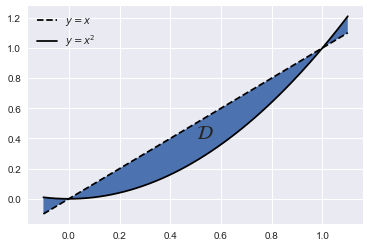

In [78]:
x= np.linspace(-.1,1.1)
y=x**2

plt.plot(x,x,'k--',label='$y=x$')
plt.plot(x,y,'k',label='$y=x^2$')
plt.fill_between(x,x,y)
plt.text(.5,.4,'$\mathcal{D}$',fontsize=20)
plt.legend(loc='best')
plt.show()

$$ I=\int_0^1(x-x^2)dx$$

In [82]:
#Número de puntos tirados aleatoriamente
Num=1000000
f=lambda x:x-x**2
a,b=0,1
Altura=1

x=np.random.uniform(a,b,Num)
y=np.random.uniform(a,Altura,Num)

#Integración por montecarlo
N_0=len(x[y<f(x)])
Base=b-a
yest=N_0/Num*(Base*Altura)
print(yest)

0.166701


In [84]:
quad(f,0,1)

## Ejercicio de Tarea

Utilizar la anterior función para aproximar el área de la región descrita por 
$$ 4(2x-1)^4+8(2y-1)^8< 1+2(2y-1)^3(3x-2)^2 $$
Poner los resultados en una tabla en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la paroximación ( usar 10,100,1000,10000 y 100000 términos)

In [46]:
f1= lambda x,y: 4*(2*x-1)**4+8*(2*y-1)**8
f2= lambda x,y: 1+2*(2*y-1)**3*(3*x-2)**2

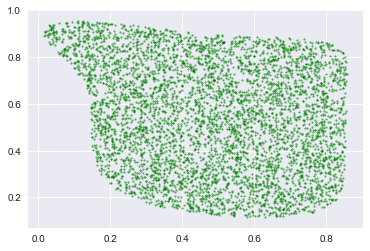

In [49]:
x1=np.random.uniform(0,1,10**4)
y1=np.random.uniform(0,1,10**4)
plt.scatter(x1[f1(x1,y1)<f2(x1,y1)],y1[f1(x1,y1)<f2(x1,y1)],s=3,c='green',alpha=.6)

,10,100,1000,10000,100000
Area,0.6,0.56,0.581,0.5474,0.54793


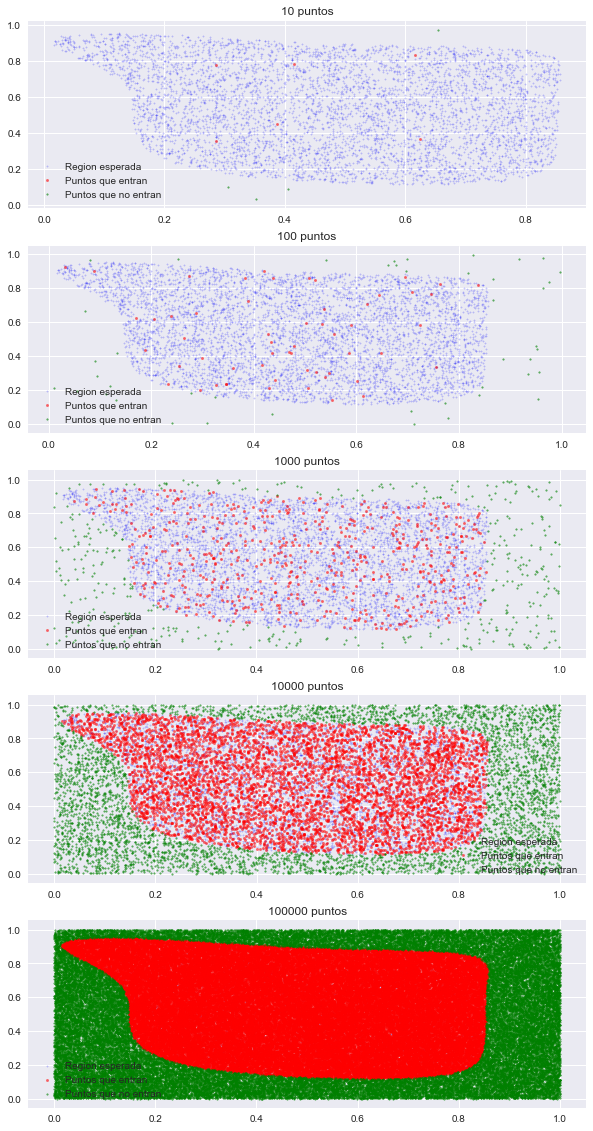

In [53]:
area=[]
fig, axs = plt.subplots(5,figsize=(10,20)) 
for i in range(1,6):
    x=np.random.uniform(0,1,10**i)
    y=np.random.uniform(0,1,10**i)
    N_0=len(x[f1(x,y)<f2(x,y)])
    Area=1
    area.append(N_0/(10**i)*Area)
    axs[i-1].scatter(x1[f1(x1,y1)<f2(x1,y1)],y1[f1(x1,y1)<f2(x1,y1)],s=2,c='blue',alpha=.2,label='Region esperada')
    axs[i-1].scatter(x[f1(x,y)<f2(x,y)],y[f1(x,y)<f2(x,y)],s=6,c='red',alpha=.6,label='Puntos que entran')
    axs[i-1].scatter(x[f1(x,y)>f2(x,y)],y[f1(x,y)>f2(x,y)],s=3,c='green',alpha=.6,label='Puntos que no entran')
    axs[i-1].legend()
    axs[i-1].set_title('{} puntos'.format(10**i))
pd.DataFrame([area],['Area'],[10,100,1000,10000,100000])